In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.utils.data import download_file
from astropy.io import ascii


exoplanets_url = 'http://exoplanets.org/csv-files/exoplanets.csv'
table_path = download_file(exoplanets_url, cache=True)
table = ascii.read(table_path)

In [55]:
eps = np.log10(table['MASS']/table['MSTAR'] * table['AR']**-3)

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


(array([  5.40000000e+01,   1.81000000e+02,   4.18000000e+02,
          6.29000000e+02,   3.74000000e+02,   1.99000000e+02,
          1.64000000e+02,   5.40000000e+01,   1.00000000e+00,
          3.38000000e+03]),
 array([-9.31722462, -8.28550216, -7.25377969, -6.22205723, -5.19033477,
        -4.15861231, -3.12688985, -2.09516739, -1.06344492, -0.03172246,  1.        ]),
 <a list of 10 Patch objects>)

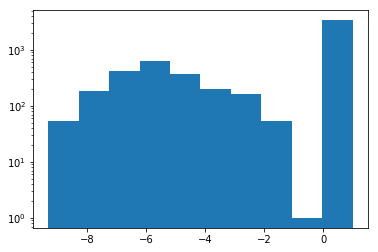

In [56]:
plt.hist(eps.data, log=True)

In [67]:
eps.data.data

array([ 1.        , -5.86011758, -6.28537406, ...,  1.        ,
        1.        ,  1.        ])

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log


[<matplotlib.text.Text at 0x111fbec50>, <matplotlib.text.Text at 0x11212fcc0>]

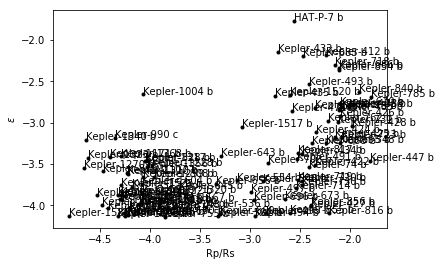

In [78]:
not_masked = np.logical_not(eps.data.mask)
high_eps = (((eps.data.data > np.percentile(eps.data.data[not_masked], 80)) & 
             not_masked & table['KDE'].data).data.astype(bool))
nobjs = np.count_nonzero(high_eps)

fig, ax = plt.subplots()
for i in range(nobjs):
    x, y = np.log(table['RR'].data.data[high_eps][i]), eps[high_eps][i]

    if np.isfinite(x):
        ax.scatter(x, y, marker='.', color='k')
        ax.annotate(table['NAME'].data.data[high_eps][i], xy=(x, y))

ax.set(xlabel='Rp/Rs', ylabel='$\epsilon$')